In [11]:
import os
import sys

import numpy as np
#from skimage import io
#import skimage
import matplotlib.pyplot as plt
#from meta_load import *

sys.path.append(os.path.join("..",'Data_prep'))
sys.path.append(os.path.join("..",'Models2'))

from Custom_dataloader import *
import pandas as pd
import matplotlib.pyplot as plt

DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase"
Dbd="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
#DBd="//MYCLOUDPR4100/Paltas_DataBase/Data_Base"
#DB="//MYCLOUDPR4100/Paltas_DataBase"
#d_t=transforms.Compose([phantom_segmentation(False)])

datar=Dataset_direct(root_dir=Dbd,ImType=['PhantomRGB'],Intersec=False,retrieve_img=False)

pd.options.display.max_columns = None

In [12]:
os.listdir(os.path.join(DB,"metadata"))
meta=['bl_per_wmask_phantom','stat_val_hsv_wmask_phantom','stat_val_lab_wmask_phantom']
ddlist=np.array(os.listdir(os.path.join(DB,"metadata",meta[0])))
dlist=np.vectorize(lambda d:d.split(".")[0])(ddlist)

In [13]:
date=np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)
Y=np.vectorize(lambda d:datar[np.where(datar.aID==d)[0][0]]["landmarks"])(dlist)
timei=np.vectorize(lambda d:datar[np.where(datar.aID==d)[0][0]]['PhantomRGB_metadata']['DateTime'])(dlist)

In [14]:
dat=np.vectorize(lambda d:(pd.read_pickle(os.path.join(DB,"metadata",meta[0],d)))[d.split('.')[0]])(ddlist).reshape(-1,1)
camp=np.array(['mean','std','mode'])
dat1=np.vectorize(lambda d,c:(pd.read_pickle(os.path.join(DB,"metadata",meta[1],d)))[d.split('.')[0]][c],
            signature="(),()->()")(ddlist.reshape(-1,1),camp)
dat2=np.vectorize(lambda d,c:(pd.read_pickle(os.path.join(DB,"metadata",meta[2],d)))[d.split('.')[0]][c],
            signature="(),()->()")(ddlist.reshape(-1,1),camp)


In [15]:
date=np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)

In [16]:
mDF=get_dataframe(metad_dict)
data=mDF
mDF

NameError: name 'get_dataframe' is not defined

In [5]:
#Normalize
import sklearn
from sklearn.preprocessing import StandardScaler
cont=mDF.columns[0:-3]
features = mDF[cont]


scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
mDF[cont]=features
mDF

,z_x_mu_0,z_x_mu_1,z_x_mu_2,z_x_mu_3,z_x_mu_4,z_x_logsig_0,z_x_logsig_1,z_x_logsig_2,z_x_logsig_3,z_x_logsig_4,w_x_mu_0,w_x_mu_1,w_x_mu_2,w_x_mu_3,w_x_mu_4,w_x_logsig_0,w_x_logsig_1,w_x_logsig_2,w_x_logsig_3,w_x_logsig_4,py_0,py_1,py_2,py_3,py_4,py_5,py_6,py_7,py_8,py_9,py_10,py_11,Place,Date,Class
0,0.468921,-0.386569,-0.229431,0.638517,0.624523,0.0,0.0,0.0,-0.018451,0.0,0.621348,-0.601467,0.024981,0.120557,0.286244,0.0,0.0,-0.016114,0.0,0.0,0.596799,-0.634441,0.157945,-0.728058,0.575004,-0.907749,0.150356,0.987989,-0.501988,0.958549,-0.645380,0.526335,6_A,16_junio_1,N_Exceso
1,-0.389551,-1.364856,-0.318026,-2.361955,-1.873530,0.0,0.0,0.0,-0.018451,0.0,-0.335132,0.349306,-2.387180,-1.757292,-1.325647,0.0,0.0,-0.016114,0.0,0.0,-1.629001,0.528444,0.802665,-0.516736,-0.663746,0.313959,1.111154,-1.730183,-0.208406,0.274423,1.565400,-1.626234,4_D,29_marzo_1,Control
2,0.197772,-0.627412,1.282779,-0.858277,0.483046,0.0,0.0,0.0,-0.018451,0.0,0.030806,0.826329,0.621031,-0.794981,1.445795,0.0,0.0,-0.016114,0.0,0.0,1.668348,0.497130,-0.402721,0.046396,-0.592983,0.283852,0.303651,0.142752,0.074905,-1.075426,-0.309161,0.114785,19_G,16_junio_1,Control
3,0.732672,0.829564,0.504618,0.735012,0.643187,0.0,0.0,0.0,-0.018451,0.0,0.751603,-1.472772,0.030637,1.255679,0.039527,0.0,0.0,-0.016114,0.0,0.0,0.555039,-0.607986,1.351693,-0.631896,-0.341210,1.031312,-1.863598,0.778909,0.874984,-1.078371,-0.098857,1.055850,4_A,26_mayo_1,N_Exceso
4,0.677783,-0.252285,0.496562,0.545563,-0.135539,0.0,0.0,0.0,-0.018451,0.0,-2.243578,1.872579,1.113893,-0.131188,1.015356,0.0,0.0,-0.016114,0.0,0.0,0.898233,0.221293,-0.630309,0.295244,-0.144876,0.138062,0.094810,-0.166060,0.459069,-0.547504,-0.127991,-0.038590,15_F,28_abril_2,H75%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,1.480345,-0.028710,0.812043,-0.301096,-0.154320,0.0,0.0,0.0,-0.018451,0.0,1.310104,0.947511,1.012344,0.241013,2.180833,0.0,0.0,-0.016114,0.0,0.0,0.912154,-0.434679,-0.736072,0.659486,0.274547,0.230575,-0.684558,0.183065,0.913127,-0.582748,-0.381017,0.544823,2_D,19_mayo_2,Control
3848,0.583715,0.580605,0.559028,1.032755,0.292076,0.0,0.0,0.0,-0.018451,0.0,-0.037485,0.023530,0.672667,0.558503,-0.558285,0.0,0.0,-0.016114,0.0,0.0,-0.170961,0.543709,0.107854,0.068286,-0.730131,0.481005,0.374509,-0.541233,0.175543,-0.697130,0.535501,-0.492535,9_C,9_julio_1,K_Control
3849,-2.102284,-1.610631,-0.641096,-1.365032,-0.835765,0.0,0.0,0.0,-0.018451,0.0,-0.320262,0.317250,-2.172286,-1.627618,-1.218715,0.0,0.0,-0.016114,0.0,0.0,-0.541587,0.513131,0.559219,-0.411037,-0.730131,0.376948,0.851261,-1.093707,-0.201438,-0.252901,0.991607,-1.041110,13_E,14_abril_2,H50%
3850,0.480983,1.343172,0.861441,0.396816,1.069354,0.0,0.0,0.0,-0.018451,0.0,0.918400,-0.264425,0.479382,0.941957,1.337308,0.0,0.0,-0.016114,0.0,0.0,-0.042302,-2.103299,-0.675977,0.828277,1.843328,-1.037001,-1.438797,0.990473,1.154271,1.382165,-0.815212,1.298436,8_F,19_agosto_1,H75%


In [6]:
#Encode time and day
mDF=pd.concat([mDF,pd.get_dummies(mDF['Date'],columns='Date')],axis=1)
mDF

,z_x_mu_0,z_x_mu_1,z_x_mu_2,z_x_mu_3,z_x_mu_4,z_x_logsig_0,z_x_logsig_1,z_x_logsig_2,z_x_logsig_3,z_x_logsig_4,w_x_mu_0,w_x_mu_1,w_x_mu_2,w_x_mu_3,w_x_mu_4,w_x_logsig_0,w_x_logsig_1,w_x_logsig_2,w_x_logsig_3,w_x_logsig_4,py_0,py_1,py_2,py_3,py_4,py_5,py_6,py_7,py_8,py_9,py_10,py_11,Place,Date,Class,11_junio_1,12_mayo_1,12_mayo_2,13_agosto_1,14_abril_1,14_abril_2,14_julio_1,15_setiembre_1,16_junio_1,16_junio_2,19_agosto_1,19_mayo_1,19_mayo_2,23_julio_1,23_julio_2,23_junio_1,23_junio_2,24_setiembre_1,26_mayo_1,26_mayo_2,28_abril_1,28_abril_2,29_marzo_1,29_marzo_2,2_julio_1,2_junio_1,5_agosto_1,7_mayo_1,9_julio_1
0,0.468921,-0.386569,-0.229431,0.638517,0.624523,0.0,0.0,0.0,-0.018451,0.0,0.621348,-0.601467,0.024981,0.120557,0.286244,0.0,0.0,-0.016114,0.0,0.0,0.596799,-0.634441,0.157945,-0.728058,0.575004,-0.907749,0.150356,0.987989,-0.501988,0.958549,-0.645380,0.526335,6_A,16_junio_1,N_Exceso,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.389551,-1.364856,-0.318026,-2.361955,-1.873530,0.0,0.0,0.0,-0.018451,0.0,-0.335132,0.349306,-2.387180,-1.757292,-1.325647,0.0,0.0,-0.016114,0.0,0.0,-1.629001,0.528444,0.802665,-0.516736,-0.663746,0.313959,1.111154,-1.730183,-0.208406,0.274423,1.565400,-1.626234,4_D,29_marzo_1,Control,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.197772,-0.627412,1.282779,-0.858277,0.483046,0.0,0.0,0.0,-0.018451,0.0,0.030806,0.826329,0.621031,-0.794981,1.445795,0.0,0.0,-0.016114,0.0,0.0,1.668348,0.497130,-0.402721,0.046396,-0.592983,0.283852,0.303651,0.142752,0.074905,-1.075426,-0.309161,0.114785,19_G,16_junio_1,Control,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.732672,0.829564,0.504618,0.735012,0.643187,0.0,0.0,0.0,-0.018451,0.0,0.751603,-1.472772,0.030637,1.255679,0.039527,0.0,0.0,-0.016114,0.0,0.0,0.555039,-0.607986,1.351693,-0.631896,-0.341210,1.031312,-1.863598,0.778909,0.874984,-1.078371,-0.098857,1.055850,4_A,26_mayo_1,N_Exceso,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.677783,-0.252285,0.496562,0.545563,-0.135539,0.0,0.0,0.0,-0.018451,0.0,-2.243578,1.872579,1.113893,-0.131188,1.015356,0.0,0.0,-0.016114,0.0,0.0,0.898233,0.221293,-0.630309,0.295244,-0.144876,0.138062,0.094810,-0.166060,0.459069,-0.547504,-0.127991,-0.038590,15_F,28_abril_2,H75%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,1.480345,-0.028710,0.812043,-0.301096,-0.154320,0.0,0.0,0.0,-0.018451,0.0,1.310104,0.947511,1.012344,0.241013,2.180833,0.0,0.0,-0.016114,0.0,0.0,0.912154,-0.434679,-0.736072,0.659486,0.274547,0.230575,-0.684558,0.183065,0.913127,-0.582748,-0.381017,0.544823,2_D,19_mayo_2,Control,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3848,0.583715,0.580605,0.559028,1.032755,0.292076,0.0,0.0,0.0,-0.018451,0.0,-0.037485,0.023530,0.672667,0.558503,-0.558285,0.0,0.0,-0.016114,0.0,0.0,-0.170961,0.543709,0.107854,0.068286,-0.730131,0.481005,0.374509,-0.541233,0.175543,-0.697130,0.535501,-0.492535,9_C,9_julio_1,K_Control,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3849,-2.102284,-1.610631,-0.641096,-1.365032,-0.835765,0.0,0.0,0.0,-0.018451,0.0,-0.320262,0.317250,-2.172286,-1.627618,-1.218715,0.0,0.0,-0.016114,0.0,0.0,-0.541587,0.513131,0.559219,-0.411037,-0.730131,0.376948,0.851261,-1.093707,-0.201438,-0.252901,0.991607,-1.041110,13_E,14_abril_2,H50%,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3850,0.480983,1.343172,0.861441,0.396816,1.069354,0.0,0.0,0.0,-0.018451,0.0,0.918400,-0.264425,0.479382,0.941957,1.337308,0.0,0.0,-0.016114,0.0,0.0,-0.042302,-2.103299,-0.675977,0.828277,1.843328,-1.037001,-1.438797,0.990473,1.154271,1.382165,-0.815212,1.298436,8_F,19_agosto_1,H75%,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data=mDF.drop(["Date","Place"],axis=1)
data

,z_x_mu_0,z_x_mu_1,z_x_mu_2,z_x_mu_3,z_x_mu_4,z_x_logsig_0,z_x_logsig_1,z_x_logsig_2,z_x_logsig_3,z_x_logsig_4,w_x_mu_0,w_x_mu_1,w_x_mu_2,w_x_mu_3,w_x_mu_4,w_x_logsig_0,w_x_logsig_1,w_x_logsig_2,w_x_logsig_3,w_x_logsig_4,py_0,py_1,py_2,py_3,py_4,py_5,py_6,py_7,py_8,py_9,py_10,py_11,Class,11_junio_1,12_mayo_1,12_mayo_2,13_agosto_1,14_abril_1,14_abril_2,14_julio_1,15_setiembre_1,16_junio_1,16_junio_2,19_agosto_1,19_mayo_1,19_mayo_2,23_julio_1,23_julio_2,23_junio_1,23_junio_2,24_setiembre_1,26_mayo_1,26_mayo_2,28_abril_1,28_abril_2,29_marzo_1,29_marzo_2,2_julio_1,2_junio_1,5_agosto_1,7_mayo_1,9_julio_1
0,0.468921,-0.386569,-0.229431,0.638517,0.624523,0.0,0.0,0.0,-0.018451,0.0,0.621348,-0.601467,0.024981,0.120557,0.286244,0.0,0.0,-0.016114,0.0,0.0,0.596799,-0.634441,0.157945,-0.728058,0.575004,-0.907749,0.150356,0.987989,-0.501988,0.958549,-0.645380,0.526335,N_Exceso,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.389551,-1.364856,-0.318026,-2.361955,-1.873530,0.0,0.0,0.0,-0.018451,0.0,-0.335132,0.349306,-2.387180,-1.757292,-1.325647,0.0,0.0,-0.016114,0.0,0.0,-1.629001,0.528444,0.802665,-0.516736,-0.663746,0.313959,1.111154,-1.730183,-0.208406,0.274423,1.565400,-1.626234,Control,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.197772,-0.627412,1.282779,-0.858277,0.483046,0.0,0.0,0.0,-0.018451,0.0,0.030806,0.826329,0.621031,-0.794981,1.445795,0.0,0.0,-0.016114,0.0,0.0,1.668348,0.497130,-0.402721,0.046396,-0.592983,0.283852,0.303651,0.142752,0.074905,-1.075426,-0.309161,0.114785,Control,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.732672,0.829564,0.504618,0.735012,0.643187,0.0,0.0,0.0,-0.018451,0.0,0.751603,-1.472772,0.030637,1.255679,0.039527,0.0,0.0,-0.016114,0.0,0.0,0.555039,-0.607986,1.351693,-0.631896,-0.341210,1.031312,-1.863598,0.778909,0.874984,-1.078371,-0.098857,1.055850,N_Exceso,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.677783,-0.252285,0.496562,0.545563,-0.135539,0.0,0.0,0.0,-0.018451,0.0,-2.243578,1.872579,1.113893,-0.131188,1.015356,0.0,0.0,-0.016114,0.0,0.0,0.898233,0.221293,-0.630309,0.295244,-0.144876,0.138062,0.094810,-0.166060,0.459069,-0.547504,-0.127991,-0.038590,H75%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,1.480345,-0.028710,0.812043,-0.301096,-0.154320,0.0,0.0,0.0,-0.018451,0.0,1.310104,0.947511,1.012344,0.241013,2.180833,0.0,0.0,-0.016114,0.0,0.0,0.912154,-0.434679,-0.736072,0.659486,0.274547,0.230575,-0.684558,0.183065,0.913127,-0.582748,-0.381017,0.544823,Control,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3848,0.583715,0.580605,0.559028,1.032755,0.292076,0.0,0.0,0.0,-0.018451,0.0,-0.037485,0.023530,0.672667,0.558503,-0.558285,0.0,0.0,-0.016114,0.0,0.0,-0.170961,0.543709,0.107854,0.068286,-0.730131,0.481005,0.374509,-0.541233,0.175543,-0.697130,0.535501,-0.492535,K_Control,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3849,-2.102284,-1.610631,-0.641096,-1.365032,-0.835765,0.0,0.0,0.0,-0.018451,0.0,-0.320262,0.317250,-2.172286,-1.627618,-1.218715,0.0,0.0,-0.016114,0.0,0.0,-0.541587,0.513131,0.559219,-0.411037,-0.730131,0.376948,0.851261,-1.093707,-0.201438,-0.252901,0.991607,-1.041110,H50%,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3850,0.480983,1.343172,0.861441,0.396816,1.069354,0.0,0.0,0.0,-0.018451,0.0,0.918400,-0.264425,0.479382,0.941957,1.337308,0.0,0.0,-0.016114,0.0,0.0,-0.042302,-2.103299,-0.675977,0.828277,1.843328,-1.037001,-1.438797,0.990473,1.154271,1.382165,-0.815212,1.298436,H75%,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Clasificación para detección de deficiencia hidrica
data=data[(data['Class']=='Control')|\
          #(data['Y']=='K_Control')|\
          #(data['Y']=='N_Control')|\
          #(data['Y']=='P_Control')|\
          (data['Class']=='H50%')\
           #(data['Y']=='H75%')\
         ]
X=data
X=X.drop("Class",axis=1)
#X=data[list(data.columns[0:])]
print(X.columns)
Yo=((data['Class']=='Control') |\
    (data['Class']=='K_Control') |\
    (data['Class']=='N_Control') |\
    (data['Class']=='P_Control')).astype(int)
X.head()

Index(['z_x_mu_0', 'z_x_mu_1', 'z_x_mu_2', 'z_x_mu_3', 'z_x_mu_4',
       'z_x_logsig_0', 'z_x_logsig_1', 'z_x_logsig_2', 'z_x_logsig_3',
       'z_x_logsig_4', 'w_x_mu_0', 'w_x_mu_1', 'w_x_mu_2', 'w_x_mu_3',
       'w_x_mu_4', 'w_x_logsig_0', 'w_x_logsig_1', 'w_x_logsig_2',
       'w_x_logsig_3', 'w_x_logsig_4', 'py_0', 'py_1', 'py_2', 'py_3', 'py_4',
       'py_5', 'py_6', 'py_7', 'py_8', 'py_9', 'py_10', 'py_11', '11_junio_1',
       '12_mayo_1', '12_mayo_2', '13_agosto_1', '14_abril_1', '14_abril_2',
       '14_julio_1', '15_setiembre_1', '16_junio_1', '16_junio_2',
       '19_agosto_1', '19_mayo_1', '19_mayo_2', '23_julio_1', '23_julio_2',
       '23_junio_1', '23_junio_2', '24_setiembre_1', '26_mayo_1', '26_mayo_2',
       '28_abril_1', '28_abril_2', '29_marzo_1', '29_marzo_2', '2_julio_1',
       '2_junio_1', '5_agosto_1', '7_mayo_1', '9_julio_1'],
      dtype='object')


,z_x_mu_0,z_x_mu_1,z_x_mu_2,z_x_mu_3,z_x_mu_4,z_x_logsig_0,z_x_logsig_1,z_x_logsig_2,z_x_logsig_3,z_x_logsig_4,w_x_mu_0,w_x_mu_1,w_x_mu_2,w_x_mu_3,w_x_mu_4,w_x_logsig_0,w_x_logsig_1,w_x_logsig_2,w_x_logsig_3,w_x_logsig_4,py_0,py_1,py_2,py_3,py_4,py_5,py_6,py_7,py_8,py_9,py_10,py_11,11_junio_1,12_mayo_1,12_mayo_2,13_agosto_1,14_abril_1,14_abril_2,14_julio_1,15_setiembre_1,16_junio_1,16_junio_2,19_agosto_1,19_mayo_1,19_mayo_2,23_julio_1,23_julio_2,23_junio_1,23_junio_2,24_setiembre_1,26_mayo_1,26_mayo_2,28_abril_1,28_abril_2,29_marzo_1,29_marzo_2,2_julio_1,2_junio_1,5_agosto_1,7_mayo_1,9_julio_1
1,-0.389551,-1.364856,-0.318026,-2.361955,-1.873530,0.0,0.0,0.0,-0.018451,0.0,-0.335132,0.349306,-2.387180,-1.757292,-1.325647,0.0,0.0,-0.016114,0.0,0.0,-1.629001,0.528444,0.802665,-0.516736,-0.663746,0.313959,1.111154,-1.730183,-0.208406,0.274423,1.565400,-1.626234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.197772,-0.627412,1.282779,-0.858277,0.483046,0.0,0.0,0.0,-0.018451,0.0,0.030806,0.826329,0.621031,-0.794981,1.445795,0.0,0.0,-0.016114,0.0,0.0,1.668348,0.497130,-0.402721,0.046396,-0.592983,0.283852,0.303651,0.142752,0.074905,-1.075426,-0.309161,0.114785,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.323145,-0.004112,0.380395,0.857568,-0.002868,0.0,0.0,0.0,-0.018451,0.0,0.657554,-0.105354,0.563549,0.321680,-0.207938,0.0,0.0,-0.016114,0.0,0.0,-0.295936,-0.920781,1.496794,-0.175089,-0.553686,1.146912,-0.831216,-0.087600,0.115993,-1.086975,0.678638,0.415213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,1.842502,-0.289763,0.799055,-0.223027,-0.753314,0.0,0.0,0.0,-0.018451,0.0,-0.220538,1.511688,1.082772,0.183618,1.883194,0.0,0.0,-0.016114,0.0,0.0,0.579092,-1.099977,-0.319214,0.775505,0.459415,0.523404,-1.378723,0.387241,1.102049,-0.697958,-0.327388,0.986554,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,-1.484751,-0.885602,-0.685397,-0.187137,-1.490589,0.0,0.0,0.0,-0.018451,0.0,-0.138382,0.242554,-1.214340,-1.311512,-0.915390,0.0,0.0,-0.016114,0.0,0.0,-0.892970,0.538604,0.629660,-0.457398,-0.708460,0.366737,0.931763,-1.290432,-0.228232,-0.088690,1.169620,-1.226852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
np.where(np.array(list(X.columns))=='py_0')

(array([20]),)

1
 R^2_train:  0.6548872180451127
 R^2_test:  0.6606606606606606
2
 R^2_train:  0.6541353383458647
 R^2_test:  0.6576576576576577
3
 R^2_train:  0.6646616541353384
 R^2_test:  0.6516516516516516
4
 R^2_train:  0.687218045112782
 R^2_test:  0.6516516516516516
5
 R^2_train:  0.6992481203007519
 R^2_test:  0.6666666666666666
6
 R^2_train:  0.7218045112781954
 R^2_test:  0.6546546546546547


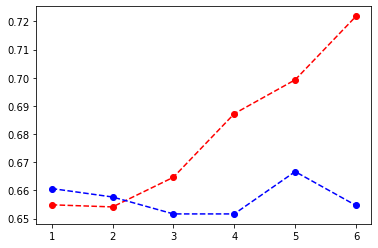

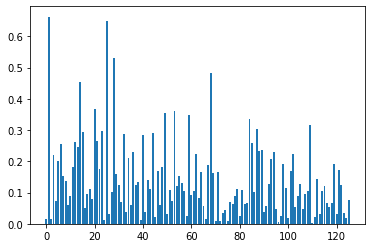

0.6666666666666666
5


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

GR=np.arange(1,7)
def LR_GR(GR,X,Y):
    polynomial_features = PolynomialFeatures(degree=GR)
    #r=polynomial_features.fit_transform(X[:,20:29])
    r=polynomial_features.fit_transform(X[:,:4])
    Xco=r
    #Xco=np.hstack((np.array(X[:,3]),np.array(X[:,13])))
    
    X_train, X_test, y_train, y_test = train_test_split(Xco, Y, random_state=20,train_size=0.8)
    Lr1=LogisticRegression(max_iter=90000000000,C=0.14530000000000132)
    #Lr1=LogisticRegression(max_iter=9000000)
    Lr1.fit(X_train,y_train)
    pr_tr=Lr1.score(X_train,y_train)
    pr_ts=Lr1.score(X_test,y_test)
    print(GR)
    print(' R^2_train: ', pr_tr)
    print(' R^2_test: ', pr_ts)
    return Lr1,GR,pr_tr,pr_ts
v_LR_GR=np.vectorize(LR_GR,signature='(),(j,k),(l)->(),(),(),()')
LR,GR,pr_tr2,pr_ts2=v_LR_GR(GR,X,np.array(Yo))

plt.plot(GR,pr_tr2, 'ro--')
plt.plot(GR,pr_ts2, 'bo--')
plt.show()

plt.bar(np.arange(LR[np.argmax(pr_ts2)].coef_[0].shape[0]),np.abs(LR[np.argmax(pr_ts2)].coef_[0]))
plt.show()

print(np.max(pr_ts2))
print(GR[np.argmax(pr_ts2)])
#plt.bar(np.arange(LR[0].coef_[0].shape[0]),np.abs(LR[0].coef_[0].sort()))
#plt.show()

In [ ]:
polynomial_features = PolynomialFeatures(degree=5)
Xc=polynomial_features.fit_transform(X[X.columns[:4]])
#Xc=polynomial_features.fit_transform(X[X.columns[20:29]])
#Xc=np.hstack((X[X.columns[6:]],Xc))
C=np.arange(0.17,0.19,0.0001)
def LR_C(C,X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20,train_size=0.8)
    Lr1=LogisticRegression(max_iter=900000,C=C)
    Lr1.fit(X_train,y_train)
    pr_tr=Lr1.score(X_train,y_train)
    pr_ts=Lr1.score(X_test,y_test)
    print(C)
    print(' R^2_train: ', pr_tr)
    print(' R^2_test: ', pr_ts)
    return Lr1,C,pr_tr,pr_ts
v_LR_C=np.vectorize(LR_C,signature='(),(j,k),(l)->(),(),(),()')

LR,C,pr_tr1,pr_ts1=v_LR_C(C,Xc,np.array(Yo))

plt.plot(C,pr_tr1, 'ro--')
plt.plot(C,pr_ts1, 'bo--')
plt.show()

0.17
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.1701
 R^2_train:  0.7
 R^2_test:  0.6666666666666666
0.1702
 R^2_train:  0.7
 R^2_test:  0.6666666666666666
0.17029999999999998
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.17039999999999997
 R^2_train:  0.7015037593984963
 R^2_test:  0.6666666666666666
0.17049999999999996
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.17059999999999995
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.17069999999999994
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.17079999999999992
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.1708999999999999
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.1709999999999999
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.1710999999999999
 R^2_train:  0.7007518796992481
 R^2_test:  0.6666666666666666
0.17119999999999988
 R^2_train:  0.7007518796992481
 R^2_test:  0.666666666666

In [50]:
print(np.max(pr_ts1))
C[np.argmax(pr_ts1)]

0.6696696696696697


0.17300000000000004

In [41]:
print(np.max(np.abs(LR[np.argmax(pr_ts2)].coef_[0])))
polynomial_features = PolynomialFeatures(degree=2)
Xc=polynomial_features.fit_transform(X[X.columns[20:29]])
np.hstack((np.array(polynomial_features.get_feature_names(X.columns[20:29]))))[np.abs(LR[np.argmax(pr_ts2)].coef_[0])>0.28]

0.28959868904796887


array(['py_1 py_4'], dtype='<U9')

In [44]:
print(X['py_1'].values)
print(X['py_4'].values)
print(X['py_4'].values*X['py_1'].values)

[ 0.52844429  0.49713036 -0.92078125 ...  1.03609288 -0.43467942
  0.5131309 ]
[-0.66374606 -0.59298259 -0.55368608 ... -1.4037751   0.27454683
 -0.73013085]
[-0.35075281 -0.29478965  0.50982377 ... -1.45444138 -0.11933986
 -0.3746527 ]
